# Base de Dados Covid

O objetivo do projeto será desenvolver um estudo no dataset `COVID.csv`, base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se desenvolver um modelo para prever casos confirmados de COVID.

<br>

A descrição das variáveis contidas no dataset pode ser encontradas a seguir:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cor
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
#Formatação de gráficos
azul_para_vermelho = sns.diverging_palette(220, 20, as_cmap=True)
cor_zero = azul_para_vermelho.get_under().tolist()
cor_um = azul_para_vermelho.get_over().tolist()
cores = [cor_zero,cor_um]

plot_style = {'axes.facecolor': 'white',
 'axes.edgecolor': 'grey',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': 'grey',
 'figure.facecolor': 'white',
 'grid.color': '#b0b0b0',
 'grid.linestyle': '--',
 'text.color': 'grey',
 'xtick.color': 'grey',
 'ytick.color': 'grey',
'patch.edgecolor': 'w',

}

sns.set_theme(style=plot_style, font_scale=1)

**Primeiro os dados serão divididos em modelagem e teste**
- A base de teste não será utilizada durante o desenvolvimento do modelo. Será usada apenas no final, para testar com dados reais como foi o comportamento do modelo;
- A base de modelagem será dividida em treino e validação após a análise exploratória dos dados 

In [3]:
covid = pd.read_csv('COVID.csv')
x = covid.drop('covid_res', axis=1)
y = covid['covid_res']

X_modelagem, X_teste, y_modelagem, y_teste = train_test_split(x, 
                                                            y, 
                                                    test_size=0.2, 
                                                    random_state=12)

dados = X_modelagem.copy()
dados['covid_res'] = y_modelagem

In [4]:
dados

,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu,covid_res
485343,485343,0,1,NaN,0.0,34,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0
313627,313627,0,1,NaN,0.0,31,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0
221635,221635,0,1,NaN,0.0,40,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0
200780,200780,1,1,NaN,0.0,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,1
383937,383937,0,1,NaN,0.0,33,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40177,40177,1,1,NaN,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1
412925,412925,1,1,NaN,0.0,47,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
255366,255366,1,1,NaN,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0
235163,235163,1,1,NaN,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0


## 1 Preparação dos Dados e Verificação de Consistência

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399753 entries, 485343 to 472907
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           399753 non-null  int64  
 1   sex                  399753 non-null  int64  
 2   patient_type         399753 non-null  int64  
 3   intubed              85991 non-null   float64
 4   pneumonia            399744 non-null  float64
 5   age                  399753 non-null  int64  
 6   pregnancy            196346 non-null  float64
 7   diabetes             398430 non-null  float64
 8   copd                 398591 non-null  float64
 9   asthma               398587 non-null  float64
 10  inmsupr              398415 non-null  float64
 11  hypertension         398557 non-null  float64
 12  other_disease        397981 non-null  float64
 13  cardiovascular       398539 non-null  float64
 14  obesity              398558 non-null  float64
 15  renal_chroni

### 1.1 Coluna estranha 'Unnamed: 0'
- Ação: Verificar se realmente é uma coluna redundante criada a partir do índice da tabela

In [6]:
#Aplica-se a função que compara cada valor da coluna 'Unnamed: 0' com o valor do indice daquele registro
#Então se houver valores Falsos é porque existem registros onde o índice é diferente do valor da coluna analisada
(dados['Unnamed: 0'] == dados.index).value_counts()

True    399753
dtype: int64

Como não houve nenhum caso Falso, entende-se que a coluna 'Unnamed: 0' é reduntante do índice e então será removida

In [7]:
dados.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
#Resetar o indice da tabela para garantir que todos os registros estão em sequencia
dados.reset_index(drop=True, inplace=True)

In [9]:
#Guardar as features
caracteristicas = dados.columns
caracteristicas

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu', 'covid_res'],
      dtype='object')

### 1.2 Dados duplicados

In [10]:
dados.duplicated().value_counts()

True     335046
False     64707
dtype: int64

In [11]:
#Porcentagem de dados duplicados em relação ao total de dados
str(round(dados.duplicated().value_counts()[1]/len(dados)*100,2)) + '%'

'83.81%'

83,81% dos dados são registros idênticos  
Precisa-se saber se esses dados são idênticos por coincidência ou são registros duplicados do mesmo caso de COVID  
Se forem registros copiados do mesmo caso de COVID, eles devem ser removidos

In [12]:
#Verificar quantidade de valores diferentes que cada caracteristica pode assumir
for caracteristica in caracteristicas:
    print(caracteristica,f'Qtdade: {len(dados[caracteristica].unique())} ', dados[caracteristica].unique(), '\n')

sex Qtdade: 2  [0 1] 

patient_type Qtdade: 2  [1 0] 

intubed Qtdade: 3  [nan  0.  1.] 

pneumonia Qtdade: 3  [ 0.  1. nan] 

age Qtdade: 117  [ 34  31  40  41  33  60  63   7  30  57  26  47  75  61  49  65  42  32
  46  67  45  53  71  54  56  52  23  13   9  74  48  28  37  72  39  21
  50  35  25  44  29  24  14  89  55  81  18  59  43  38  77  20  51  58
  70  36  83  17  27  66  76  19  12  15   0   2  68  86  64   1   6  78
  69  62   4  84  22  73  92  80  79  88  11  10  85   8  16   3   5  95
  93  87  82  94  96  90 120  91 101  97 100  98  99 104 114 106 103 115
 102 119 109 117 113 108 105 107 110] 

pregnancy Qtdade: 3  [nan  0.  1.] 

diabetes Qtdade: 3  [ 0.  1. nan] 

copd Qtdade: 3  [ 0.  1. nan] 

asthma Qtdade: 3  [ 0.  1. nan] 

inmsupr Qtdade: 3  [ 0.  1. nan] 

hypertension Qtdade: 3  [ 0.  1. nan] 

other_disease Qtdade: 3  [ 0.  1. nan] 

cardiovascular Qtdade: 3  [ 0.  1. nan] 

obesity Qtdade: 3  [ 0.  1. nan] 

renal_chronic Qtdade: 3  [ 0.  1. nan] 

tobac

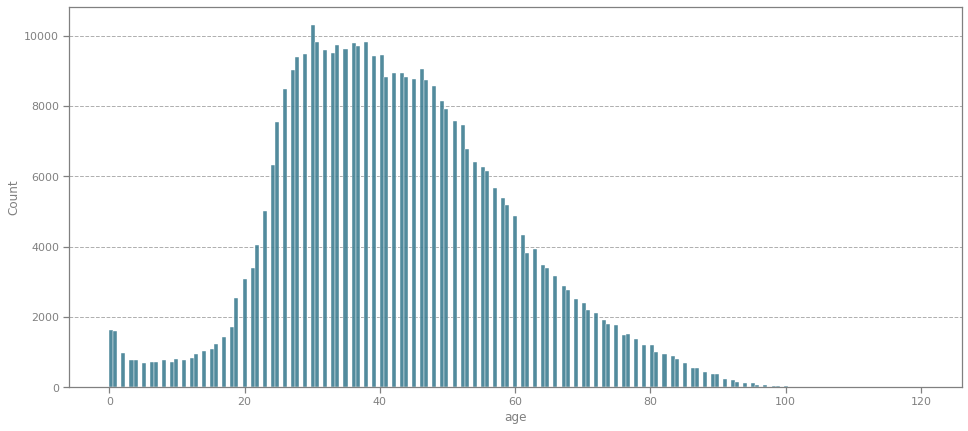

In [13]:
fig, ax = plt.subplots(figsize=[16,7])
ax.grid(axis='x')
sns.histplot(dados['age'], color=cor_zero, alpha=0.9);

Percebe-se que, com execeçao da idade, todas as outras variáveis do dataset são categoricas binárias.

A quantidade de possíveis dados diferentes para esse dataset é $ 2^{18} \times 120$ (2 possibilidades para cada uma das 18 variáveis categóricas e 120 possibilidades para a idade)

In [14]:
possibilidades = (2**18)*120
possibilidades

31457280

In [15]:
#A porcentagem de dados do dataset em relação ao total de possibilidades
str(round(len(dados)/possibilidades*100,2)) + '%'

'1.27%'

A quantidade de registros do dataset representa 1,27% do total de possibilidades de registros com essas variáveis. Parece muito pouco tendo em vista que 83,81% dos dados são registros repetidos.  
Porém olhando a distribuição de idades, percebe-se que elas estão concentradas entre 20 e 70 anos. Então farei um boxplot para descobrir onde estão 50% dos dados

In [16]:
Q1 = np.quantile(dados['age'],0.25)
Q2 = np.quantile(dados['age'],0.50)
Q3 = np.quantile(dados['age'],0.75)
IQR = Q3-Q1

Intervalo interquartil: 22.0


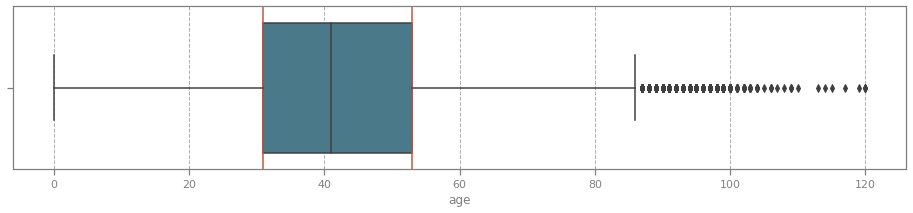

In [17]:
plt.figure(figsize=[16,3])
plt.axvline(Q1, color=cor_um)
plt.axvline(Q3, color=cor_um)

print('Intervalo interquartil:', IQR)
sns.boxplot(data=dados, x='age', palette=cores);

Utilizando a quantidade de idades do intervalo interquartil, onde concentra-se 50% dos dados, temos:

In [18]:
possibilidades = 2**18*IQR
possibilidades

5767168.0

In [19]:
str(round(len(dados)/possibilidades*100,2)) + '%'

'6.93%'

Mesmo limitando a quantidade de possíveis valores para a idade (de 120 para 22), a quantidade de possibilidades diferentes ainda é muito maior que a quantidade de registros do Dataset.  
O dataset deveria ter uma quantidade de dados muito grande para considerar que os os registros repetidos são repetidos pela limitação de possibilidades.
Então provavelmente esses dados são repetidos por mal gerenciamento de dados, podem ser cópias dos mesmos casos de COVID.  
Antes da remoção desses valores, é importante verificar a distribuição desses registros repetidos.

In [20]:
duplicados = dados[dados.duplicated()]
duplicados.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu,covid_res
91,1,1,NaN,0.0,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1
124,1,1,NaN,0.0,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1
130,0,1,NaN,0.0,40,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0
167,1,1,NaN,0.0,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0
189,0,1,NaN,0.0,31,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0


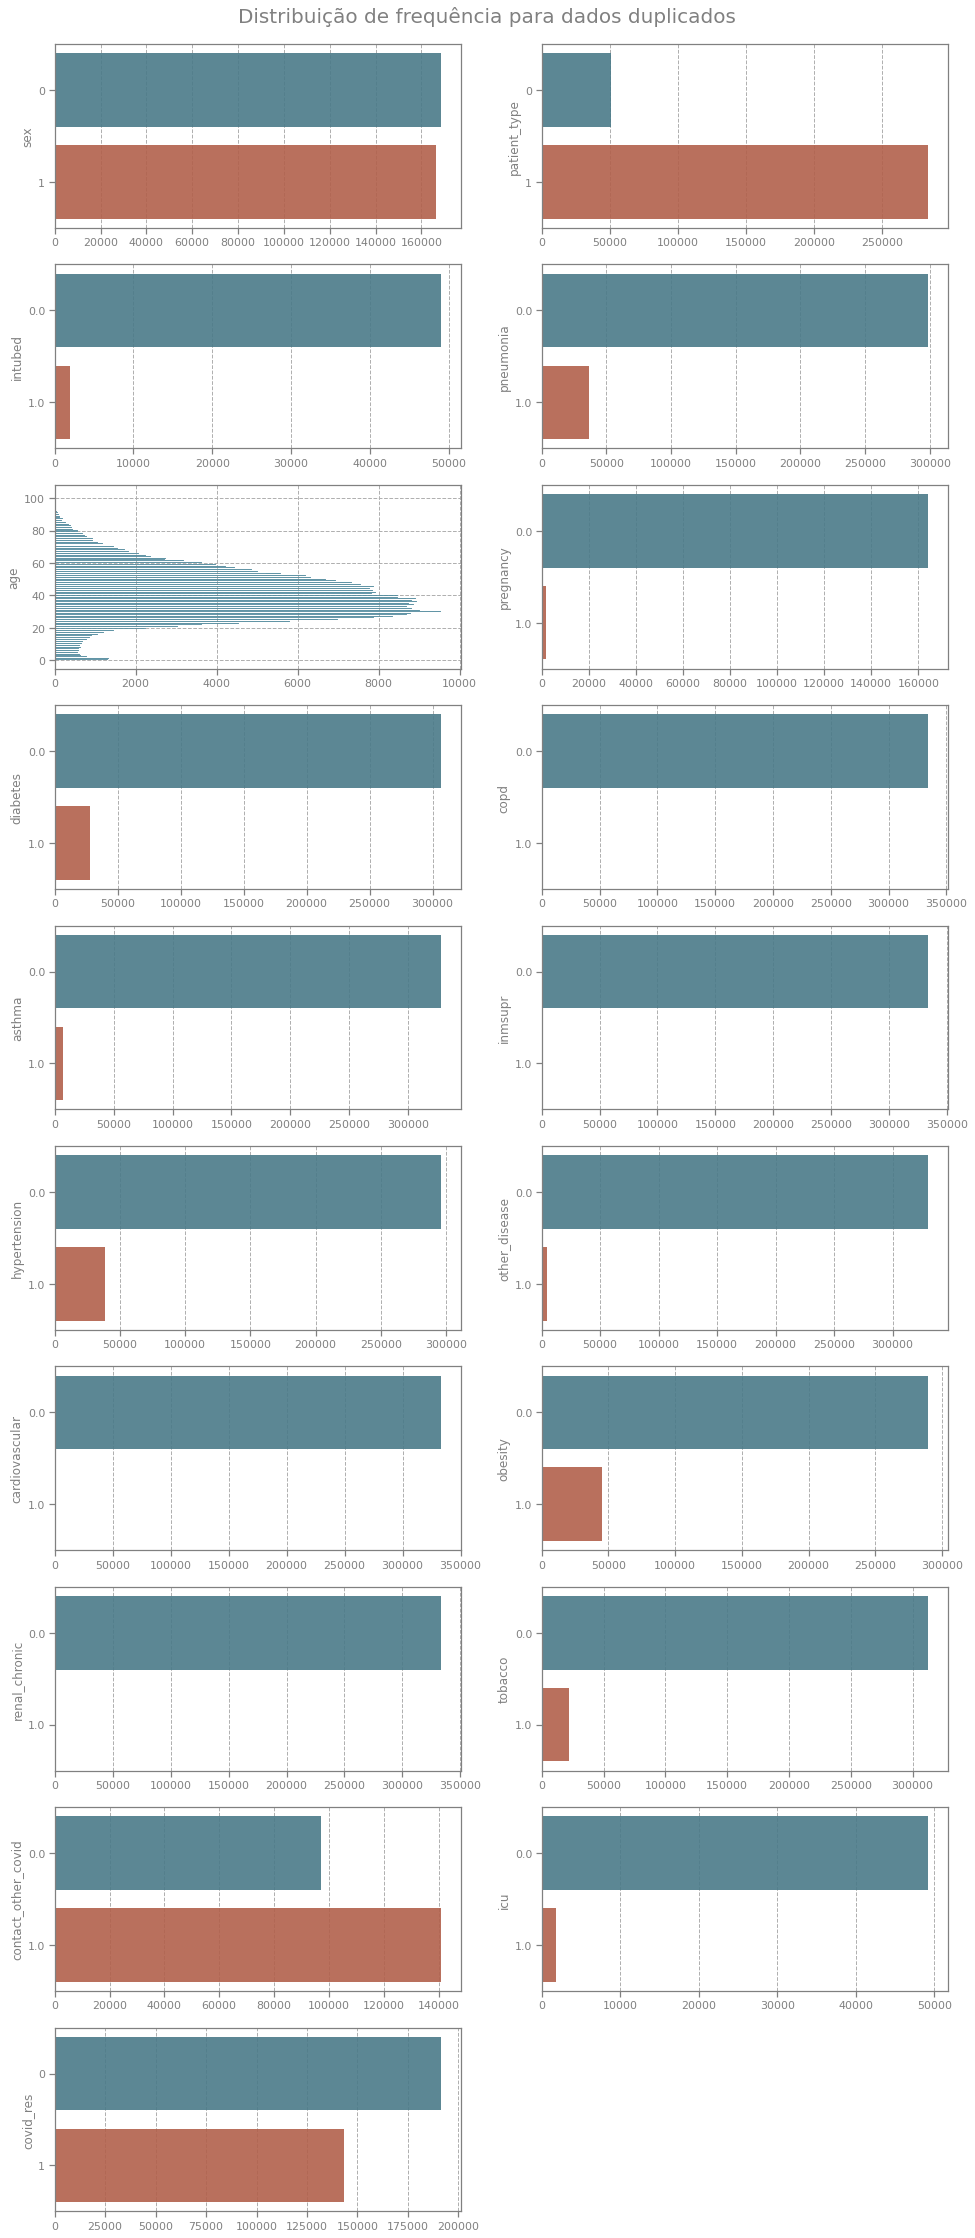

In [21]:
n = 1

fig = plt.figure(figsize=[16,35])
fig.suptitle('Distribuição de frequência para dados duplicados', fontsize=20, y=1)
fig.tight_layout()
fig.subplots_adjust(top=0.985)

for caracteristica in caracteristicas:
    plt.subplot(10,2,n)
    if caracteristica == 'age':
        grafico = sns.histplot(data=duplicados, y=caracteristica, color=cor_zero, alpha=0.9)
    else:
        grafico = sns.countplot(data=duplicados, y=caracteristica, palette=cores, alpha=0.9)
        
    grafico.set(xlabel=None)
    n += 1

Ao verificar os gráficos acima, pode-se perceber que no geral as variáveis estão desbalanceadas para 0, principalmente quando a variável é alguma doença.  

Pode-se entender isso como: no geral a maioria da população não possui essas doenças, e quando possui uma, dificilmente possuirá as outras. Isso torna o raciocinio anterior errado, pois ele relaciona as possibilidades de registros diferentes com a quantidade de registros que a base de dados possui.  


O correto a se pensar é: espera-se que a maioria das pessoas não tenham as doenças dessa base de dados e quando tiverem, terão uma ou outra doença, dessa forma a maioria das variáveis são 'zero' com frequência muito maior que a frequência de 'um'. 


Se a probabilidade de 'zero' acontecer para a maioria das variáveis é maior que a probabilidade de 'um', então a probabilidade de acontecer registros coincidentemente iguais aumenta, ou seja, os dados duplicados desse dataset podem ser de casos diferentes de COVID.

**Outra visualização interessante indicada pelo professor Helder: contar quantas vezes cada registro repetido aparece no dataset**

In [22]:
conta_duplicados = duplicados.groupby(by=caracteristicas[:-1].to_list())['covid_res'].value_counts()
conta_duplicados.name = 'contagem'
conta_duplicados = conta_duplicados.reset_index().sort_values('contagem', ascending=False)
conta_duplicados.head(10)

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu,covid_res,contagem
0,1,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,51
1192,1,0,0.0,1.0,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,42
1097,1,0,0.0,1.0,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,36
1241,1,0,0.0,1.0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,36
4,1,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,35
1168,1,0,0.0,1.0,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34
735,1,0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33
724,1,0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,31
1402,1,0,0.0,1.0,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,30
1322,1,0,0.0,1.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,30


A contagem da tabela acima confirma a tese de que a maioria das pessoas não tem nenhuma doença e isso faz com que o dataset apresente muitos registros repetidos, mesmo que eles sejam de casos de COVID diferentes.

**Então a decisão é de NÃO remover os dados duplicados, porque eles provavelmente são de casos de COVID diferentes**

### 1.3 Tratamento de valores e conversão para inteiro

In [23]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399753 entries, 0 to 399752
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  399753 non-null  int64  
 1   patient_type         399753 non-null  int64  
 2   intubed              85991 non-null   float64
 3   pneumonia            399744 non-null  float64
 4   age                  399753 non-null  int64  
 5   pregnancy            196346 non-null  float64
 6   diabetes             398430 non-null  float64
 7   copd                 398591 non-null  float64
 8   asthma               398587 non-null  float64
 9   inmsupr              398415 non-null  float64
 10  hypertension         398557 non-null  float64
 11  other_disease        397981 non-null  float64
 12  cardiovascular       398539 non-null  float64
 13  obesity              398558 non-null  float64
 14  renal_chronic        398574 non-null  float64
 15  tobacco          

Para a maioria das variáveis será aplicado a moda para valores faltantes.  
Algumas variáveis serão analisadas com maior cuidado:
- 'intubed' e 'icu': imagina-se que contem a mesma informação em duas variáveis diferentes, ou seja, os dados são iguais para as duas colunas;
- 'pregnancy': para homens com valores faltantes será aplicado zero, para mulheres será aplicado a moda;
- 'contact_other_covid': será verificada a relação entre essa variável e o resultado do teste, se a relação for forte os valores serão preenchidos de acordo com o resultado do teste, se a relação for fraca: os valores faltantes serão preenchidos com a moda.

#### 1.3.1 'intubed' e 'icu'

In [24]:
#Remoção dos valores NaN para verificar se os registros preenchidos dessas duas colunas são iguais
dados_int_icu = dados[['intubed','icu']].copy()
dados_int_icu.dropna(inplace=True)

In [25]:
#quantidade de registros preenchidos onde intubed é igual a icu
intubed_igual_icu = dados_int_icu[dados_int_icu['intubed'] == dados_int_icu['icu']].value_counts().sum()
intubed_igual_icu

78666

In [26]:
#quantidade de registros preenchidos onde intubed é diferente de icu
intubed_diferente_icu = dados_int_icu[dados_int_icu['intubed'] != dados_int_icu['icu']].value_counts().sum()
intubed_diferente_icu 

7324

In [27]:
#Porcentagem de registros diferentes em relação ao total
round(intubed_diferente_icu/(intubed_igual_icu+intubed_diferente_icu)*100,2)

8.52

Para a maioria dos registros preenchidos, 'intubed' é igual a 'icu'. Porém não se pode considerar que as variáveis contém a mesma informação porque em 8,52% dos registros, a variável 'intubed' é diferente da variável 'icu'. Então a decisão é de manter as duas variáveis para análise.

Para essas duas variáveis, os valores NaN serão preenchidos de três formas:
- 1ª Quando o registro possui NaN para uma variável e valor na outra, o valor NaN recebe a cópia da variável com valor: isso porque assume-se que se está entubado também está internado na UTI e vice-versa;
- 2ª A variável 'patient_type' será usada para ajudar a preencher as variáveis 'intubed' e 'icu' que forem NaN nos casos dos pacientes que foram dispensados para casa;
- 3ª Quando as duas variáveis são NaN, recebem o valor da moda.

In [28]:
#Primeira forma
nan_intubed_icu = pd.DataFrame({'intubed':dados['intubed'],'icu':dados['icu']}).isna() #define quais valores são faltantes para as 2 variáveis
indices_nan_dif = nan_intubed_icu[nan_intubed_icu['intubed'] != nan_intubed_icu['icu']].index #seleciona os registros em que há valor faltante em uma variável e a outra é preenchida

indices_nan_intubed = dados.loc[indices_nan_dif][dados['intubed'].loc[indices_nan_dif].isna()].index #indices que são NaN em 'intubed' mas tem valor em 'icu'
indices_nan_icu = dados.loc[indices_nan_dif][dados['icu'].loc[indices_nan_dif].isna()].index  #indices que são NaN em 'icu' mas tem valor em 'intubed'

dados['intubed'].loc[indices_nan_intubed] = dados['icu'].loc[indices_nan_intubed] #valores NaN da variável 'intubed' recebem valores da variável 'icu'
dados['icu'].loc[indices_nan_icu] = dados['intubed'].loc[indices_nan_icu] #valores NaN da variável 'icu' recebem valores da variável 'intubed'

C:\Users\lucas\anaconda3\envs\Dsdegree\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
#Segunda forma
indices_nan_intubed = dados['intubed'][dados['intubed'].isna()].index
indices_nan_icu = dados['icu'][dados['icu'].isna()].index

dados['intubed'].loc[indices_nan_intubed] = np.where(dados['patient_type'].loc[indices_nan_intubed]==1,0, np.nan)
dados['icu'].loc[indices_nan_icu] = np.where(dados['patient_type'].loc[indices_nan_icu]==1,0, np.nan)

C:\Users\lucas\anaconda3\envs\Dsdegree\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\lucas\anaconda3\envs\Dsdegree\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Depois das duas formas para preencher dados faltantes, alguns números:

In [30]:
#Quantidade de dados onde 'intubed' é igual a 'icu'
dados[['intubed','icu']][dados['intubed'] == dados['icu']].value_counts().sum()

392336

In [31]:
#Quantidade de dados onde 'intubed' é diferente de 'icu'
dados[['intubed','icu']][dados['intubed'] != dados['icu']].value_counts().sum()

7324

In [32]:
#Quantidade de dados que ainda faltam ser preenchidos
dados[['intubed','icu']].isna().value_counts()

intubed  icu  
False    False    399660
True     True         93
dtype: int64

A etapa de transformação para a moda será feita junto com as outras variáveis

**Ultima verificação de consistência entre as variáveis 'patient_type' e 'intubed' e entre 'patient_type' e 'icu'**  
Se o paciente foi dispensado para casa, é inconsistente que ele tenha sido entubado ou internado na UTI

In [33]:
dados[['patient_type','intubed']][(dados['patient_type'] == 1) & (dados['intubed']==1)]

,patient_type,intubed


In [34]:
dados[['patient_type','icu']][(dados['patient_type'] == 1) & (dados['icu']==1)]

,patient_type,icu


Não houveram casos das inconsistências analisadas. 
Os dados restantes serão preenchidos com a moda, mas não haverá problema com esse tipo de inconsistência pois os pacientes que foram dispensados para casa já tiveram as variáveis 'intubed' e 'icu' preenchidas com zero.

#### 1.3.2 'pregnancy'
Essa variável só pode ser verdadeira para mulheres

In [35]:
#garante que todos os homens não estão gravidos para valores faltantes
dados['pregnancy'].loc[dados['sex'][dados['sex']==0].index] = 0

C:\Users\lucas\anaconda3\envs\Dsdegree\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


As mulheres com valor NaN de gravidez receberão o valor da moda na próxima etapa

#### 1.3.3 Verificação da correlação entre 'contact_other_covid' e 'covid_res'

In [36]:
corr_cont_res = dados[['contact_other_covid','covid_res']]
corr_cont_res[corr_cont_res['contact_other_covid'].notna()].corr()

,contact_other_covid,covid_res
contact_other_covid,1.000000,-0.063348
covid_res,-0.063348,1.000000


Resultado inesperado de correlação negativa entre essa variáveis. Ou seja, é mais provável que alguem teste positivo que não entrou em contato com pessoas infectadas teste positivo do que alguem que entrou em contato.  
Como essa correlação é fraca -6% não pode-se usar a variável de saída para preencher os dados faltantes da variável 'contact_other_covid'. O próximo passo é analisar a distribuição.

In [37]:
#Quantidade de valores 1 e 0 para a variável 'contact_other_covid'
dados['contact_other_covid'].value_counts()

1.0    157510
0.0    119357
Name: contact_other_covid, dtype: int64

In [38]:
#Porcentagem de valores 1
dados['contact_other_covid'].value_counts()[1]/dados['contact_other_covid'].value_counts().sum()*100

56.89013136271206

In [39]:
#Porcentagem de valores 0
dados['contact_other_covid'].value_counts()[0]/dados['contact_other_covid'].value_counts().sum()*100

43.10986863728794

Como a distribuição dos valores é parecida, preencher os valores NaN com a moda provavelmente será prejudicial para análise dos dados e para o desempenho do modelo. Então nesse caso, todos os registros em que 'contact_other_covid' é NaN serão removidos.

In [40]:
dados = dados[dados['contact_other_covid'].notna()]
dados.reset_index(inplace=True, drop=True)
dados

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu,covid_res
0,0,1,0.0,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0,1,0.0,0.0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,1,1,0.0,0.0,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0,1,0.0,0.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,1,1,0.0,0.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276862,1,1,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
276863,0,1,0.0,0.0,66,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
276864,1,1,0.0,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
276865,1,1,0.0,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#### 1.3.4 Aplicação da moda para todos os NaN restantes e transformação para inteiro
Obs.: caso ouvessem valores faltantes para a variável de saída, os registros seriam excluidos. Não faz sentido tratar o dado que se deseja prever.

In [41]:
for caracteristica in caracteristicas:
    dados[caracteristica].fillna(dados[caracteristica].mode()[0], inplace=True)
    
dados = dados.astype(int)

C:\Users\lucas\anaconda3\envs\Dsdegree\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [42]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276867 entries, 0 to 276866
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   sex                  276867 non-null  int32
 1   patient_type         276867 non-null  int32
 2   intubed              276867 non-null  int32
 3   pneumonia            276867 non-null  int32
 4   age                  276867 non-null  int32
 5   pregnancy            276867 non-null  int32
 6   diabetes             276867 non-null  int32
 7   copd                 276867 non-null  int32
 8   asthma               276867 non-null  int32
 9   inmsupr              276867 non-null  int32
 10  hypertension         276867 non-null  int32
 11  other_disease        276867 non-null  int32
 12  cardiovascular       276867 non-null  int32
 13  obesity              276867 non-null  int32
 14  renal_chronic        276867 non-null  int32
 15  tobacco              276867 non-null  int32
 16  co

### 1.4 Verificação e remoção de outliers para a idade

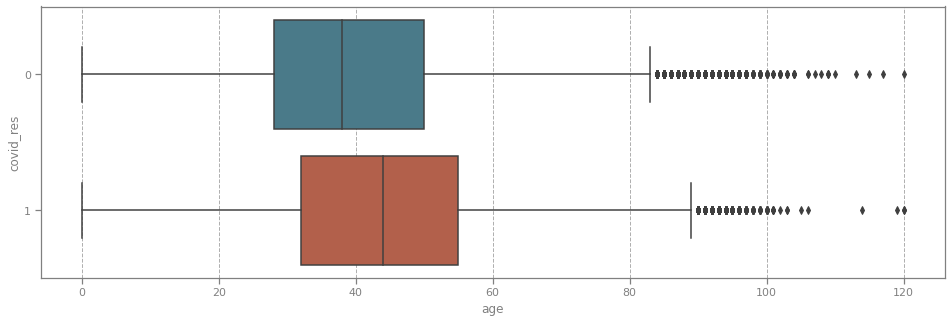

In [43]:
plt.figure(figsize=[16.2,5])
sns.boxplot(data=dados, x='age', y='covid_res', orient='h', palette=cores);

Percebe-se que existe uma tendência leve de pessoas mais velhas testar positivo. Nesse caso parece inapropriado remover as maiores idades. Caso o modelo apresente mal desempenho, remover os outliers da idade pode ser uma opção de melhoria.

## 2 Análise Exploratória dos Dados

### 2.1 Visualização da incidência dos dados separados pelo resultado do teste

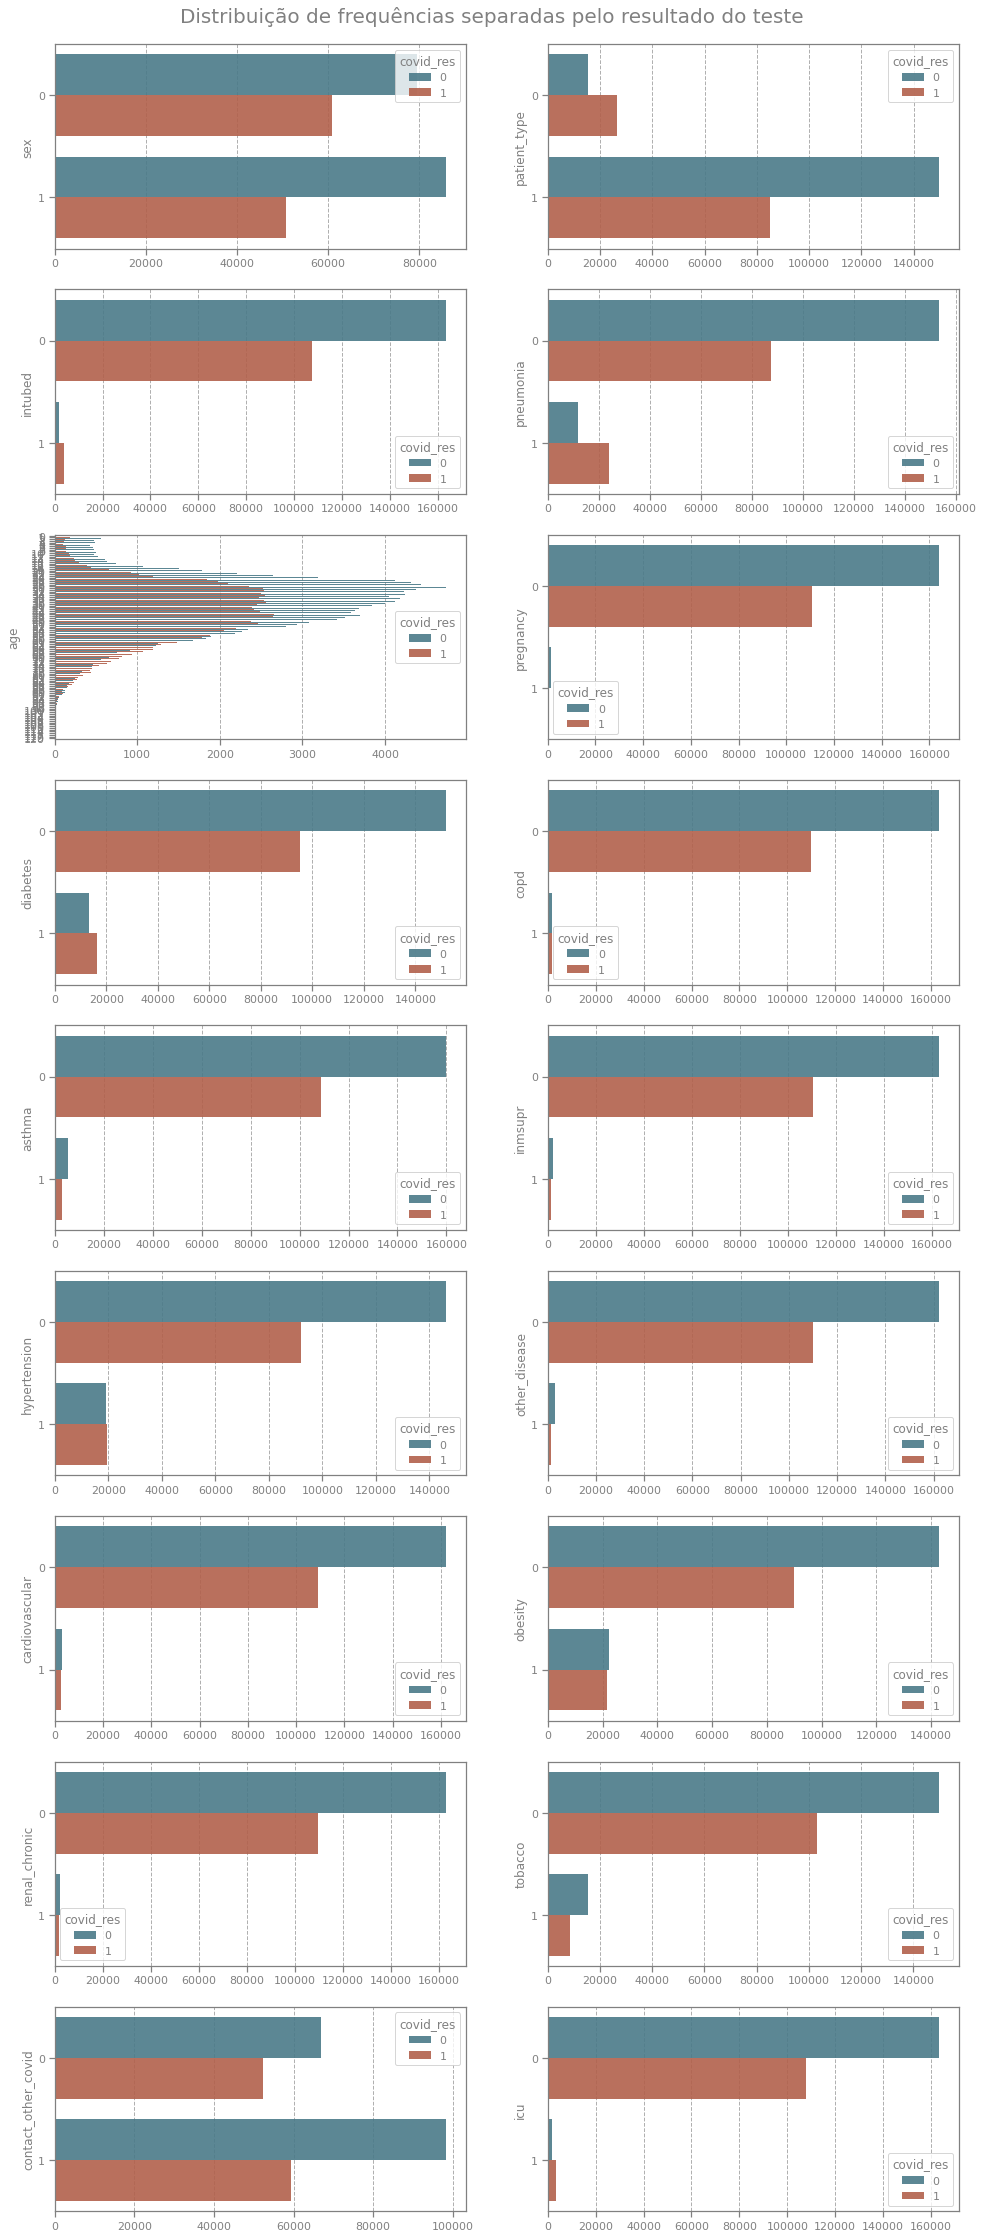

In [44]:
fig = plt.figure(figsize=[16.2,35])
fig.suptitle('Distribuição de frequências separadas pelo resultado do teste', fontsize=20, y=1)
fig.tight_layout()
fig.subplots_adjust(top=0.985)

n = 1
for caracteristica in caracteristicas[:-1]:
    plt.subplot(9,2,n)
    grafico = sns.countplot(data=dados, y=caracteristica, hue='covid_res', palette=cores, alpha=0.9) 
    grafico.set(xlabel=None)
    n += 1

**Considerações entre as variáveis de entrada e o resultado do teste:**  
- Sexo: Mulheres testam negativo com maior frequência e homens e testam positivo com maior frequência;
- Tipo de paciente: a maioria dos pacientes foram dispensados para casa, dos que foram a maioria testaram negativo. Para os que foram hospitalizados, a maioria testou positivo;
- Entubados: poucos pacientes foram entubados, dos que foram, a maioria testou positivo;
- Pneumonia: quem tem pneumonia tem grandes chances de testar positivo;
- Idade: pelas distribuições percebe-se que a maioria dos dados são para casos testados negativo. Mesmo que a maioria dos dados são de casos negativos, para idades mais avançadas a quantidade de positivos é maior que a quantidade de negativos. Isso mostra que a idade tem forte influência no resultado do teste;
- Gravidez: como a quantidade de pacientes grávidas é muito pequena, fica difícil tirar alguma conclusão nesse gráfico;
- Diabetes: pesoas com diabetes tendem a testar positivo;
- Copd: aparentemente quem tem Copd tem um pouco mais de chance de testar positivo;
- Asma: aparentemente não tem muita correlação;
- Imunosupressão: parece ter correlação negativa (casos de imunosupressão tendem a testar negativo);
- Hipertensão: alguma correlação;
- Outras doenças: nenhuma ou baixa correlação;
- Doenças cardíacas: nenhuma ou baixa correlação;
- Obesidade: alguma correlação;
- Problemas renais: alguma correlação;
- Fumantes: nenhuma ou baixa correlação;
- Contato com infectados: aparente correlação negativa;
- Internados na UTI: poucas amostras de internados, porém tem boa correlação com o resultado do teste.

### 2.2 Mapa de calor das correlações

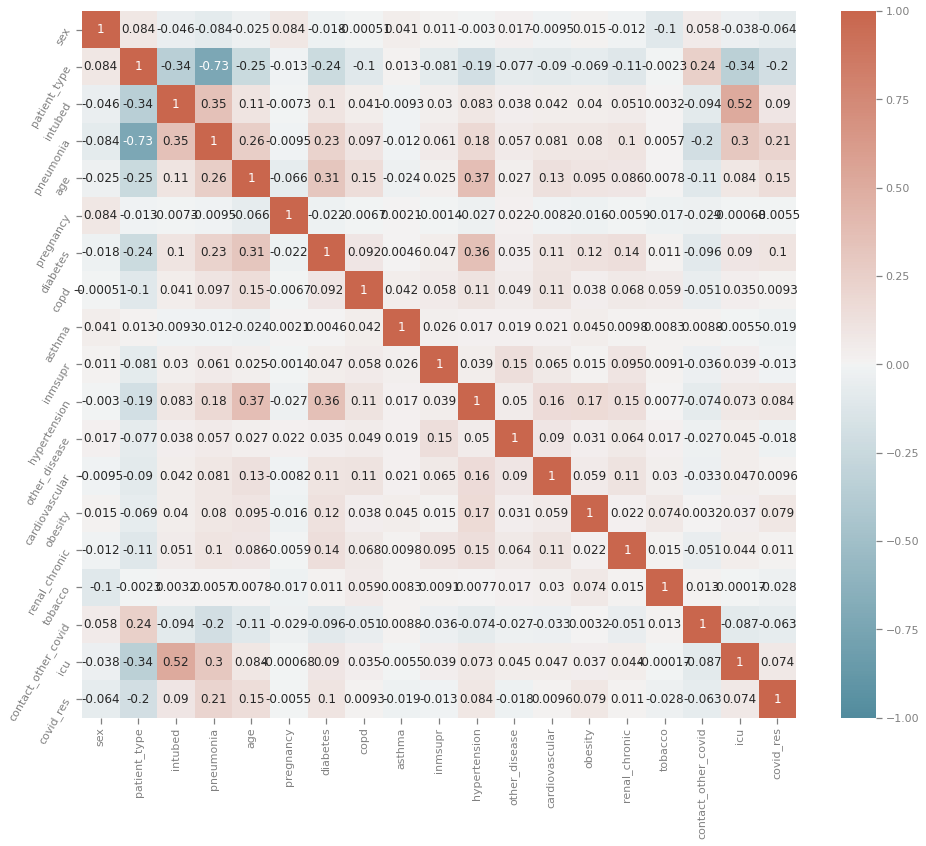

In [45]:
plt.figure(figsize=[16,13])
sns.heatmap(dados.corr(), annot=True, cmap=azul_para_vermelho, vmin=-1, vmax=1, alpha=0.9)
plt.yticks(rotation=60);

Gravidez, COPD e doenças cardíacas têm correlação menor que 1%  
Percebe-se também que as variáveis 'patient_type', 'intubed', 'pneumonia' e 'age' tem alto grau de correlação entre si (positiva ou negativa) e bom grau de correlação com o resultado do teste.  

**Opta-se por remover as variáveis com o módulo da correlação menor que 1%**

In [46]:
dados.drop(['pregnancy', 'copd', 'cardiovascular'], axis=1, inplace=True)

### 2.3 Verificação da variável de saída

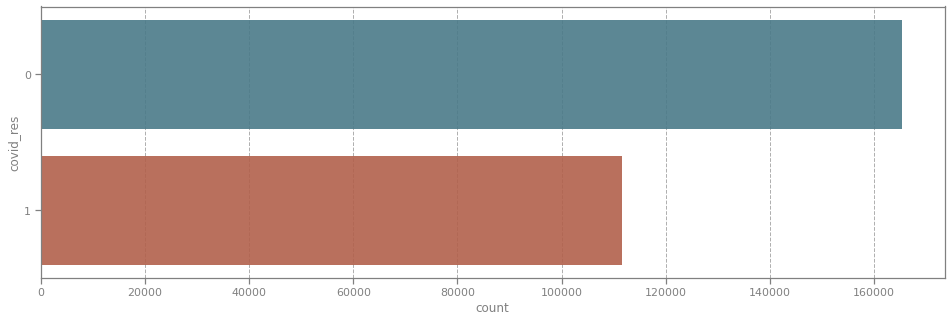

In [47]:
plt.figure(figsize=[16.2,5])
sns.countplot(data=dados, y='covid_res', palette=cores, alpha=0.9);

A variável de saída está balanceada

## 3 Modelagem dos Dados

Serão utilizadas as métricas acurácia, precisão e recall ao longo do desenvolvimento do modelo para avaliar o desempenho. Como o recall informa a porcentagem de acerto dos casos positivos em relação a todos os casos que realmente são positivos, essa métrica será a de maior importância, já que o objetivo é prever casos de COVID (quanto mais acertar dos casos reais melhor).

Os escolhidos são de categorias de algoritmos diferentes:
- KNN (cálculo das distâncias)
- Random Forest (bagging)
- LightGBM (boosting)

In [48]:
#Bibliotecas para métricas
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [49]:
#Separação dos dados de modelagem em treino e validação
x = dados.drop('covid_res', axis=1)
y = dados['covid_res']
X_treino, X_valid, y_treino, y_valid = train_test_split(x, y, test_size=0.3, random_state=12)

In [50]:
#Função para plotar as métricas de desempenho do modelo
def metricas(y_treino,y_treino_pred,y_valid,y_valid_pred):
    acc_train = accuracy_score(y_treino, y_treino_pred)
    prec_train = precision_score(y_treino, y_treino_pred)
    rec_train = recall_score(y_treino, y_treino_pred)

    acc_valid = accuracy_score(y_valid, y_valid_pred)
    prec_valid = precision_score(y_valid, y_valid_pred)
    rec_valid = recall_score(y_valid, y_valid_pred)

    print(f'Treino:\nAcc: {acc_train:.3f}, Precision: {prec_train:.3f}, Recall: {rec_train:.3f}')
    print(f'Validação:\nAcc: {acc_valid:.3f}, Precision: {prec_valid:.3f}, Recall: {rec_valid:.3f}')

### 3.1 KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

#Compiando os dados de treino e validação para o KNN pois a variável 'age' será normalizada
X_treino_KNN = X_treino.copy()
X_valid_KNN = X_valid.copy()

y_treino_KNN = y_treino.copy()
y_valid_KNN = y_valid.copy()

#### Normalização da variável 'age'

Como o algoritmo do KNN funciona ao calcular as distâncias entre o dado que se quer conhecer até os dados já conhecidos, todas as features devem estar na mesma escala. Isso porque se uma feature está numa escala diferente das demais, ao calcular a distância, essa variável terá peso diferente. É como se a dimenção da variável que está fora de escala fosse esticada ou encurtada. Nesse caso enquanto todas as variáveis variam de 0 a 1, 'age' varia de 0 a 120. Então o correto é levar essa variável para a mesma escala das outras.

De acordo com o professor Helder, normalmente se usa o StandardScaler para padronizar os dados. A padronização transforma a distribuição para média zero e desvio padrão 1. Porém como as outras variáveis são binárias (0 ou 1), acredito que seja mais adequado fazer a normalização da idade para que as distancias fiquem entre 0 e 1.  

Obs.: Tentei usar o Normalizer do scikitlearn, mas depois que se faz o fit com uma quantidade de dados, o transform só aceita a mesma quantidade de dados. Então resolvi criar uma classe que guarda os valores máximo e mínimo para cada feature que for feito o fit. O transform usa o nome da série ou da coluna do DataFrame para encontrar os respectivos valores máximo e mínimo daquela variável e então fazer a normalização.

In [52]:
class Normalizador():
    
    def __init__(self):
        self.vmax = {}
        self.vmin = {}
        
    def fit(self,dados):
        if isinstance(dados, pd.DataFrame): #se for dataframe guarda no dicionario os valores máximo e mímino para cada variável
            for feature in dados.columns:
                self.vmax[feature] = dados[feature].max()
                self.vmin[feature] = dados[feature].min()
                
        elif isinstance(dados, pd.Series): #se for serie guarda no dicionario os valores máximo e mímino para aquela variável
            self.vmax[dados.name] = dados.max()
            self.vmin[dados.name] = dados.min()
            
        else:
            return print('Utilize pandas.DataFrame ou pandas.Series')
        
    def transform(self,dados):
        if isinstance(dados, pd.DataFrame):
            retornado = pd.DataFrame()
#normaliza os dados de cada variável que está no dicionário, se uma alguma coluna do dataframe não está no dicionário
#a coluna é retornada sem nenhuma alteração
            for feature in dados.columns: 
                if feature in self.vmax.keys():
                    retornado[feature] = dados[feature].apply(lambda x: (x-self.vmin[feature])/(self.vmax[feature]-self.vmin[feature]))
                else:
                    retornado[feature] = dados[feature]   
            return retornado

        elif isinstance(dados, pd.Series):
            if dados.name in self.vmax.keys():
                return dados.apply(lambda x: (x-self.vmin[dados.name])/(self.vmax[dados.name]-self.vmin[dados.name]))
            else:
                return print('É necessário fazer o fit para essa série primeiro')
        else:
            return print('Utilize pandas.DataFrame ou pandas.Series')
        
    def limpar_fit(self): 
        self.vmax = {}
        self.vmin = {}        

In [53]:
normal = Normalizador()
normal.fit(X_treino_KNN['age'])
X_treino_KNN['age'] = normal.transform(X_treino_KNN['age'])
X_valid_KNN['age'] = normal.transform(X_valid_KNN['age'])
X_treino_KNN.head()

,sex,patient_type,intubed,pneumonia,age,diabetes,asthma,inmsupr,hypertension,other_disease,obesity,renal_chronic,tobacco,contact_other_covid,icu
74224,0,0,1,1,0.416667,0,0,0,0,0,0,0,1,0,0
148061,1,1,0,0,0.408333,0,0,0,0,0,0,0,0,0,0
94322,1,1,0,0,0.183333,0,0,0,0,0,0,0,0,0,0
265171,1,0,0,1,0.408333,0,0,0,1,0,0,0,0,0,0
29752,0,1,0,0,0.516667,1,0,0,0,0,0,0,0,0,0


In [54]:
modelo_knn = KNeighborsClassifier(n_neighbors=20)
modelo_knn.fit(X_treino_KNN, y_treino_KNN)

y_treino_KNN_pred = modelo_knn.predict(X_treino_KNN)
y_valid_KNN_pred = modelo_knn.predict(X_valid_KNN)

In [55]:
metricas(y_treino_KNN,y_treino_KNN_pred,y_valid_KNN,y_valid_KNN_pred)

Treino:
Acc: 0.655, Precision: 0.646, Recall: 0.317
Validação:
Acc: 0.639, Precision: 0.609, Recall: 0.300


**Vizinhos: 4**  
Treino:  
Acc: 0.634, Precision: 0.579, Recall: 0.333  
Validação:  
Acc: 0.604, Precision: 0.519, Recall: 0.295  

---------------------------------------------------

**Vizinhos: 20**  
Treino:  
Acc: 0.655, Precision: 0.646, Recall: 0.317  
Validação:  
Acc: 0.639, Precision: 0.609, Recall: 0.300  

---------------------------------------------------

**Vizinhos: 50**  
Treino:  
Acc: 0.655, Precision: 0.660, Recall: 0.296  
Validação:  
Acc: 0.647, Precision: 0.642, Recall: 0.289  

**Melhor modelo entre os analisados: baseado no overfitting e recall**  
Vizinhos: 20  

### 3.2 Random Forest

#### 3.2.1 Árvore de decisão
Antes de implementar o Random Forest, será verificada a profundidade de uma árvore de decisão e as métricas de treino e validação

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [57]:
modelo_dt = DecisionTreeClassifier(random_state=12)
modelo_dt.fit(X_treino, y_treino)
y_treino_dt_pred = modelo_dt.predict(X_treino)
y_valid_dt_pred = modelo_dt.predict(X_valid)

modelo_dt.get_depth()

33

A árvore possui 33 camadas

In [58]:
metricas(y_treino,y_treino_dt_pred,y_valid,y_valid_dt_pred)

Treino:
Acc: 0.688, Precision: 0.771, Recall: 0.318
Validação:
Acc: 0.635, Precision: 0.618, Recall: 0.254


Como as métricas de treino estão muito melhores que as métricas de validação, o modelo está super ajustado aos dados de treino. Isso era de se esperar, já que uma árvore sem profundidade máxima limitada vai subdividindo até acabar as possibilidades de decisão. Será utilizado o Random Forest para tentar diminuir o overfitting.

#### 3.2.2 Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

Como a idéia do Random Forest é utilizar a moda do resultado de várias árvores independentes. O ideal é que essas árvores tenham alta variância (sejam especializadas em prever os próprios dados de treino). Se cada árvore é especializada no próprio conjunto de dados, tomar a moda do resultado dessas árvores faz com que diminua a variância do resultado final, o que aumenta a chance de prever corretamente novos dados.

Para que as árvores tenham a maior variância possível, o ideal é que elas cheguem até a última camada possível (deixar as árvores crescerem até acabar as divisões). Então não será usado o parâmetro max_depth do RandomForestClassifier. 

A quantidade de registros que serão reamostrados para cada árvore vai depender da quantidade de árvores.  
num_reamostragem = (quantidade de registros da base de treino)/(número de árvores)  
Será feito dessa forma por 2 motivos:
- 1) Acelerar o fit e o predict, já que ao aumentar o número de árvores, diminuirá a quantidade de exemplos por árvore;
- 2) Quantidades de exemplos muito grandes geram dados de treino muito parecidos do ponto de vista estatístico, e isso é uma caracteristica indesejável, já que queremos ter árvores diferentes entre si.

Depois de escolher um bom número de árvores, será analisada a quantidade de exemplos de cada árvore com o número de árvores fixado.

In [60]:
num_arvores = 100
num_reamostragem = round(len(X_treino)/num_arvores)
#num_reamostragem = 7752

modelo_rf = RandomForestClassifier(random_state=12, max_features='sqrt', n_estimators=num_arvores, max_samples=num_reamostragem)
modelo_rf.fit(X_treino, y_treino)

RandomForestClassifier(max_features='sqrt', max_samples=1938, random_state=12)

In [61]:
y_treino_RF_pred = modelo_rf.predict(X_treino)
y_valid_RF_pred = modelo_rf.predict(X_valid)

In [62]:
metricas(y_treino,y_treino_RF_pred ,y_valid,y_valid_RF_pred)

Treino:
Acc: 0.654, Precision: 0.664, Recall: 0.285
Validação:
Acc: 0.650, Precision: 0.657, Recall: 0.283


**Numero de árvores: 10**  
**Numero de exemplos de cada árvore: 19381**  
Treino:  
Acc: 0.658, Precision: 0.660, Recall: 0.308  
Validação:  
Acc: 0.640, Precision: 0.618, Recall: 0.289  

---------------------------------------------------

**Numero de árvores: 50**  
**Numero de exemplos de cada árvore: 3876**  
Treino:  
Acc: 0.654, Precision: 0.652, Recall: 0.303  
Validação:  
Acc: 0.646, Precision: 0.633, Recall: 0.296  

---------------------------------------------------

**Numero de árvores: 100**  
**Numero de exemplos de cada árvore: 1938**  
Treino:  
Acc: 0.654, Precision: 0.664, Recall: 0.285  
Validação:  
Acc: 0.650, Precision: 0.657, Recall: 0.283  

---------------------------------------------------

**Numero de árvores: 500**  
**Numero de exemplos de cada árvore: 388**  
Treino:  
Acc: 0.652, Precision: 0.671, Recall: 0.266  
Validação:  
Acc: 0.651, Precision: 0.674, Recall: 0.267  

---------------------------------------------------

### Numero de árvores fixado: 100
**Numero de exemplos de cada árvore: 3876**  
Treino:  
Acc: 0.657, Precision: 0.665, Recall: 0.296  
Validação:  
Acc: 0.648, Precision: 0.644, Recall: 0.290  

---------------------------------------------------
 
**Numero de exemplos de cada árvore: 7752**  
Treino:  
Acc: 0.661, Precision: 0.677, Recall: 0.300  
Validação:  
Acc: 0.648, Precision: 0.645, Recall: 0.289  

O aumento na quantidade de árvores e redução no número de registros na reamostragem influenciou na diminuição do overfitting.  

Aumentar a número de exemplos de cada árvore para parâmetros que já estão bons aumentou o overfitting.

**Melhor modelo entre os analisados: baseado no overfitting e recall**  
Numero de árvores: 100  
Numero de exemplos de cada árvore: 1938

### 3.3 LightGBM

Como o LightGBM é um algoritimo de boosting, ele vai aprendendo com os erros dos estimadores. Então o desejável é que cada estimador tenha viés forte e que o algoritmo aprenda com os erros de um estimador para outro. Então a profundidade máxima dos estimadores será inicialmente fixada em 1.

In [63]:
from lightgbm import LGBMClassifier

In [64]:
modelo_lgbm = LGBMClassifier(importance_type='gain', max_depth=1, n_estimators=100, learning_rate=10)
modelo_lgbm.fit(X_treino, y_treino)

LGBMClassifier(importance_type='gain', learning_rate=10, max_depth=1)

In [65]:
y_treino_LGBM_pred = modelo_lgbm.predict(X_treino)
y_valid_LGBM_pred = modelo_lgbm.predict(X_valid)

In [66]:
metricas(y_treino,y_treino_LGBM_pred ,y_valid,y_valid_LGBM_pred)

Treino:
Acc: 0.394, Precision: 0.396, Recall: 0.964
Validação:
Acc: 0.395, Precision: 0.398, Recall: 0.963


### max_depth: 1

**Numero de árvores: 10**  
**Taxa de aprendizado: 0,01**  
Treino:  
Acc: 0.597, Precision: 0.000, Recall: 0.000  
Validação:  
Acc: 0.596, Precision: 0.000, Recall: 0.000  

---------------------------------------------------

**Numero de árvores: 10**  
**Taxa de aprendizado: 0,1**  
Treino:  
Acc: 0.642, Precision: 0.673, Recall: 0.216  
Validação:  
Acc: 0.640, Precision: 0.672, Recall: 0.217  

---------------------------------------------------

**Numero de árvores: 10**  
**Taxa de aprendizado: 1**  
Treino:  
Acc: 0.647, Precision: 0.681, Recall: 0.233  
Validação:  
Acc: 0.646, Precision: 0.682, Recall: 0.235  

---------------------------------------------------

**Numero de árvores: 10**  
**Taxa de aprendizado: 10**  
Treino:  
Acc: 0.394, Precision: 0.396, Recall: 0.964  
Validação:  
Acc: 0.395, Precision: 0.398, Recall: 0.963  
**melhorou muito o recall mas piorou muito as outras métricas, provavelmente esse learning rate alto com poucas árvores, faz
com que o algoritmo preveja 1 para a grande maioria dos casos**

---------------------------------------------------

**Numero de árvores: 100**  
**Taxa de aprendizado: 0,01**  
Treino:  
Acc: 0.642, Precision: 0.673, Recall: 0.216  
Validação:  
Acc: 0.640, Precision: 0.672, Recall: 0.217  

---------------------------------------------------

**Numero de árvores: 100**  
**Taxa de aprendizado: 0,1**  
Treino:  
Acc: 0.649, Precision: 0.680, Recall: 0.240  
Validação:  
Acc: 0.648, Precision: 0.681, Recall: 0.242  

---------------------------------------------------

**Numero de árvores: 100**  
**Taxa de aprendizado: 1**  
Treino:  
Acc: 0.651, Precision: 0.671, Recall: 0.261  
Validação:  
Acc: 0.649, Precision: 0.670, Recall: 0.262  

---------------------------------------------------

**Numero de árvores: 100**  
**Taxa de aprendizado: 10**  
Treino:  
Acc: 0.394, Precision: 0.396, Recall: 0.964  
Validação:  
Acc: 0.395, Precision: 0.398, Recall: 0.963  
**mesmos resultados que o modelo com 10 árvores e taxa de aprendizado 10**

---------------------------------------------------

### Variação do max_depth
**Parâmetros fixados:**  
**Numero de árvores: 10**  
**Taxa de aprendizado: 10**  

**max_depth: 2**  
Treino:  
Acc: 0.598, Precision: 0.601, Recall: 0.001  
Validação:  
Acc: 0.596, Precision: 0.512, Recall: 0.001  

---------------------------------------------------

**max_depth: 3**  
Treino:  
Acc: 0.597, Precision: 0.000, Recall: 0.000  
Validação:  
Acc: 0.596, Precision: 0.000, Recall: 0.000  

**Melhor modelo entre os analisados: baseado no overfitting e recall**   
Numero de árvores: 10  
Taxa de aprendizado: 10  
max_depth: 1  

### 3.4 Escolha do modelo (Comparação KNN, Random Forest e LightGBM)

### KNN
**20 vizinhos**  

Treino:  
Acc: 0.655, Precision: 0.646, Recall: 0.317  
Validação:  
Acc: 0.639, Precision: 0.609, Recall: 0.300  


### Random Forest
**Numero de árvores: 100**  
**Numero de exemplos de cada árvore: 1938**  
Treino:  
Acc: 0.654, Precision: 0.664, Recall: 0.285  
Validação:  
Acc: 0.650, Precision: 0.657, Recall: 0.283  


### LightGBM
**Numero de árvores: 10**  
**Taxa de aprendizado: 10**  
**max_depth: 1**   
Treino:  
Acc: 0.394, Precision: 0.396, Recall: 0.964  
Validação:  
Acc: 0.395, Precision: 0.398, Recall: 0.963  

### Escolha
Entre os modelos analisados o que se saiu melhor em relação ao recall foi o LightGBM. Esse modelo apresentou recall muito superior aos demais, porém menor acurácia e precisão.  

Como o objetivo é prever casos de COVID, é desejavel que o modelo acerte a maioria dos casos que realmente são positivos, mesmo que haja muitos falso positivos (casos que o paciente foi previsto como positivo, mas na verdade não possui COVID).

Além de ter o melhor recall, o LightGBM é mais leve para processar e possui mais parâmetros para variar na otimização. Então ele é o escolhido para a próxima etapa.

## 4 Otimização do Modelo

Nessa etapa será utilizado o GridSearchCV do scikit learn. Como esse algoritmo já faz validação cruzada, não serão utilizados apenas os dados do X_treino, mas todos os dados da modelagem para encontrar os melhores parâmetros.

A partir dos melhores parâmetros, será feito o ajuste do modelo LightGBM com o X_treino e então fazer a comparação das métricas de predição do X_treino e X_valid

### 4.1 GridSearch

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
modelo_otimizacao = LGBMClassifier()

parameters = {
    'n_estimators': [10, 20, 40, 80, 160, 320],
    'learning_rate': [0.01, 0.5, 1, 5, 10],
    'max_depth': [1, 2, 3, 4],
    'is_unbalance': [True, False],
    'importance_type': ['gain']
}

clf = GridSearchCV(modelo_otimizacao, parameters, verbose=3, scoring='recall')
clf.fit(x,y)  #x e y foram criados no início da seção 3

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.000 total time=   0.2s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.000 total time=   0.2s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.000 total time=   0.2s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.000 total time=   0.2s
[CV 5/5] END importance_type=gain, is_unbalance=True, learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.000 total time=   0.2s
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=0.01, max_depth=1, n_estimators=20;, score=0.000 total time=   0.3s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=0.01, max_depth=1, n_estimators=20;, score=0.000 tot

[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.000 total time=   0.3s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.000 total time=   0.2s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.000 total time=   0.2s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.000 total time=   0.3s
[CV 5/5] END importance_type=gain, is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.000 total time=   0.2s
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20;, score=0.000 total time=   0.3s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20;, score=0.000 total time=   0.3s
[CV 3/5] END importance_type=gain, is_unbalance=

[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=0.5, max_depth=1, n_estimators=10;, score=0.389 total time=   0.2s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=0.5, max_depth=1, n_estimators=10;, score=0.381 total time=   0.2s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=0.5, max_depth=1, n_estimators=10;, score=0.481 total time=   0.2s
[CV 5/5] END importance_type=gain, is_unbalance=True, learning_rate=0.5, max_depth=1, n_estimators=10;, score=0.478 total time=   0.2s
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=0.5, max_depth=1, n_estimators=20;, score=0.474 total time=   0.2s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=0.5, max_depth=1, n_estimators=20;, score=0.477 total time=   0.3s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=0.5, max_depth=1, n_estimators=20;, score=0.431 total time=   0.3s
[CV 4/5] END importance_type=gain, is_unbalance=True, l

[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.446 total time=   0.3s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.422 total time=   0.3s
[CV 5/5] END importance_type=gain, is_unbalance=True, learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.437 total time=   0.3s
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=0.5, max_depth=3, n_estimators=20;, score=0.436 total time=   0.3s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=0.5, max_depth=3, n_estimators=20;, score=0.468 total time=   0.3s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=0.5, max_depth=3, n_estimators=20;, score=0.456 total time=   0.3s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=0.5, max_depth=3, n_estimators=20;, score=0.461 total time=   0.4s
[CV 5/5] END importance_type=gain, is_unbalance=True, l

[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=10;, score=0.591 total time=   0.2s
[CV 5/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=10;, score=0.585 total time=   0.2s
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=20;, score=0.439 total time=   0.2s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=20;, score=0.447 total time=   0.3s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=20;, score=0.465 total time=   0.3s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=20;, score=0.442 total time=   0.3s
[CV 5/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=20;, score=0.441 total time=   0.3s
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=1

[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=3, n_estimators=20;, score=0.465 total time=   0.3s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=3, n_estimators=20;, score=0.447 total time=   0.3s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=3, n_estimators=20;, score=0.473 total time=   0.3s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=3, n_estimators=20;, score=0.469 total time=   0.3s
[CV 5/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=3, n_estimators=20;, score=0.454 total time=   0.3s
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=3, n_estimators=40;, score=0.469 total time=   0.4s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=3, n_estimators=40;, score=0.478 total time=   0.4s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=1

[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=5, max_depth=1, n_estimators=20;, score=0.817 total time=   0.3s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=5, max_depth=1, n_estimators=20;, score=0.818 total time=   0.3s
[CV 5/5] END importance_type=gain, is_unbalance=True, learning_rate=5, max_depth=1, n_estimators=20;, score=0.820 total time=   0.3s
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=5, max_depth=1, n_estimators=40;, score=0.818 total time=   0.3s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=5, max_depth=1, n_estimators=40;, score=0.819 total time=   0.3s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=5, max_depth=1, n_estimators=40;, score=0.817 total time=   0.3s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=5, max_depth=1, n_estimators=40;, score=0.818 total time=   0.3s
[CV 5/5] END importance_type=gain, is_unbalance=True, learning_rate=5

[CV 5/5] END importance_type=gain, is_unbalance=True, learning_rate=5, max_depth=3, n_estimators=20;, score=0.361 total time=   0.3s
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=5, max_depth=3, n_estimators=40;, score=0.171 total time=   0.4s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=5, max_depth=3, n_estimators=40;, score=0.511 total time=   0.4s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=5, max_depth=3, n_estimators=40;, score=0.168 total time=   0.4s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=5, max_depth=3, n_estimators=40;, score=0.510 total time=   0.4s
[CV 5/5] END importance_type=gain, is_unbalance=True, learning_rate=5, max_depth=3, n_estimators=40;, score=0.361 total time=   0.4s
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=5, max_depth=3, n_estimators=80;, score=0.171 total time=   0.6s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=5

[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=10, max_depth=1, n_estimators=40;, score=0.000 total time=   0.3s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=10, max_depth=1, n_estimators=40;, score=0.000 total time=   0.3s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=10, max_depth=1, n_estimators=40;, score=0.000 total time=   0.3s
[CV 5/5] END importance_type=gain, is_unbalance=True, learning_rate=10, max_depth=1, n_estimators=40;, score=0.000 total time=   0.3s
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=10, max_depth=1, n_estimators=80;, score=0.000 total time=   0.3s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=10, max_depth=1, n_estimators=80;, score=0.000 total time=   0.4s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=10, max_depth=1, n_estimators=80;, score=0.000 total time=   0.4s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning

[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=10, max_depth=3, n_estimators=40;, score=0.000 total time=   0.4s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=10, max_depth=3, n_estimators=40;, score=0.084 total time=   0.4s
[CV 5/5] END importance_type=gain, is_unbalance=True, learning_rate=10, max_depth=3, n_estimators=40;, score=0.776 total time=   0.4s
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=10, max_depth=3, n_estimators=80;, score=0.072 total time=   0.6s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=10, max_depth=3, n_estimators=80;, score=0.768 total time=   0.6s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=10, max_depth=3, n_estimators=80;, score=0.000 total time=   0.6s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=10, max_depth=3, n_estimators=80;, score=0.084 total time=   0.7s
[CV 5/5] END importance_type=gain, is_unbalance=True, learning

[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=0.01, max_depth=1, n_estimators=40;, score=0.000 total time=   0.3s
[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=0.01, max_depth=1, n_estimators=40;, score=0.000 total time=   0.3s
[CV 1/5] END importance_type=gain, is_unbalance=False, learning_rate=0.01, max_depth=1, n_estimators=80;, score=0.215 total time=   0.4s
[CV 2/5] END importance_type=gain, is_unbalance=False, learning_rate=0.01, max_depth=1, n_estimators=80;, score=0.218 total time=   0.4s
[CV 3/5] END importance_type=gain, is_unbalance=False, learning_rate=0.01, max_depth=1, n_estimators=80;, score=0.218 total time=   0.4s
[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=0.01, max_depth=1, n_estimators=80;, score=0.217 total time=   0.4s
[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=0.01, max_depth=1, n_estimators=80;, score=0.215 total time=   0.4s
[CV 1/5] END importance_type=gain, is_unb

[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=40;, score=0.179 total time=   0.4s
[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=40;, score=0.150 total time=   0.4s
[CV 1/5] END importance_type=gain, is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=80;, score=0.203 total time=   0.5s
[CV 2/5] END importance_type=gain, is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=80;, score=0.209 total time=   0.5s
[CV 3/5] END importance_type=gain, is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=80;, score=0.209 total time=   0.5s
[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=80;, score=0.206 total time=   0.5s
[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=80;, score=0.204 total time=   0.5s
[CV 1/5] END importance_type=gain, is_unb

[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=0.5, max_depth=1, n_estimators=40;, score=0.250 total time=   0.3s
[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=0.5, max_depth=1, n_estimators=40;, score=0.251 total time=   0.3s
[CV 1/5] END importance_type=gain, is_unbalance=False, learning_rate=0.5, max_depth=1, n_estimators=80;, score=0.252 total time=   0.4s
[CV 2/5] END importance_type=gain, is_unbalance=False, learning_rate=0.5, max_depth=1, n_estimators=80;, score=0.259 total time=   0.4s
[CV 3/5] END importance_type=gain, is_unbalance=False, learning_rate=0.5, max_depth=1, n_estimators=80;, score=0.257 total time=   0.4s
[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=0.5, max_depth=1, n_estimators=80;, score=0.254 total time=   0.4s
[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=0.5, max_depth=1, n_estimators=80;, score=0.259 total time=   0.4s
[CV 1/5] END importance_type=gain, is_unbalance=

[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=0.5, max_depth=3, n_estimators=40;, score=0.273 total time=   0.4s
[CV 1/5] END importance_type=gain, is_unbalance=False, learning_rate=0.5, max_depth=3, n_estimators=80;, score=0.272 total time=   0.5s
[CV 2/5] END importance_type=gain, is_unbalance=False, learning_rate=0.5, max_depth=3, n_estimators=80;, score=0.275 total time=   0.5s
[CV 3/5] END importance_type=gain, is_unbalance=False, learning_rate=0.5, max_depth=3, n_estimators=80;, score=0.273 total time=   0.5s
[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=0.5, max_depth=3, n_estimators=80;, score=0.276 total time=   0.5s
[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=0.5, max_depth=3, n_estimators=80;, score=0.271 total time=   0.5s
[CV 1/5] END importance_type=gain, is_unbalance=False, learning_rate=0.5, max_depth=3, n_estimators=160;, score=0.274 total time=   0.8s
[CV 2/5] END importance_type=gain, is_unbalance

[CV 1/5] END importance_type=gain, is_unbalance=False, learning_rate=1, max_depth=1, n_estimators=80;, score=0.257 total time=   0.5s
[CV 2/5] END importance_type=gain, is_unbalance=False, learning_rate=1, max_depth=1, n_estimators=80;, score=0.263 total time=   0.4s
[CV 3/5] END importance_type=gain, is_unbalance=False, learning_rate=1, max_depth=1, n_estimators=80;, score=0.260 total time=   0.4s
[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=1, max_depth=1, n_estimators=80;, score=0.260 total time=   0.4s
[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=1, max_depth=1, n_estimators=80;, score=0.262 total time=   0.4s
[CV 1/5] END importance_type=gain, is_unbalance=False, learning_rate=1, max_depth=1, n_estimators=160;, score=0.257 total time=   0.7s
[CV 2/5] END importance_type=gain, is_unbalance=False, learning_rate=1, max_depth=1, n_estimators=160;, score=0.262 total time=   0.7s
[CV 3/5] END importance_type=gain, is_unbalance=False, learn

[CV 2/5] END importance_type=gain, is_unbalance=False, learning_rate=1, max_depth=3, n_estimators=80;, score=0.276 total time=   0.5s
[CV 3/5] END importance_type=gain, is_unbalance=False, learning_rate=1, max_depth=3, n_estimators=80;, score=0.274 total time=   0.5s
[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=1, max_depth=3, n_estimators=80;, score=0.277 total time=   0.5s
[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=1, max_depth=3, n_estimators=80;, score=0.270 total time=   0.5s
[CV 1/5] END importance_type=gain, is_unbalance=False, learning_rate=1, max_depth=3, n_estimators=160;, score=0.274 total time=   0.8s
[CV 2/5] END importance_type=gain, is_unbalance=False, learning_rate=1, max_depth=3, n_estimators=160;, score=0.275 total time=   0.8s
[CV 3/5] END importance_type=gain, is_unbalance=False, learning_rate=1, max_depth=3, n_estimators=160;, score=0.275 total time=   0.9s
[CV 4/5] END importance_type=gain, is_unbalance=False, lear

[CV 3/5] END importance_type=gain, is_unbalance=False, learning_rate=5, max_depth=1, n_estimators=80;, score=0.054 total time=   0.4s
[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=5, max_depth=1, n_estimators=80;, score=0.037 total time=   0.4s
[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=5, max_depth=1, n_estimators=80;, score=0.055 total time=   0.4s
[CV 1/5] END importance_type=gain, is_unbalance=False, learning_rate=5, max_depth=1, n_estimators=160;, score=0.055 total time=   0.5s
[CV 2/5] END importance_type=gain, is_unbalance=False, learning_rate=5, max_depth=1, n_estimators=160;, score=0.039 total time=   0.5s
[CV 3/5] END importance_type=gain, is_unbalance=False, learning_rate=5, max_depth=1, n_estimators=160;, score=0.054 total time=   0.6s
[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=5, max_depth=1, n_estimators=160;, score=0.037 total time=   0.5s
[CV 5/5] END importance_type=gain, is_unbalance=False, lea

[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=5, max_depth=3, n_estimators=80;, score=0.163 total time=   0.7s
[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=5, max_depth=3, n_estimators=80;, score=0.316 total time=   0.7s
[CV 1/5] END importance_type=gain, is_unbalance=False, learning_rate=5, max_depth=3, n_estimators=160;, score=0.924 total time=   0.8s
[CV 2/5] END importance_type=gain, is_unbalance=False, learning_rate=5, max_depth=3, n_estimators=160;, score=0.288 total time=   1.1s
[CV 3/5] END importance_type=gain, is_unbalance=False, learning_rate=5, max_depth=3, n_estimators=160;, score=0.173 total time=   1.1s
[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=5, max_depth=3, n_estimators=160;, score=0.163 total time=   1.1s
[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=5, max_depth=3, n_estimators=160;, score=0.316 total time=   1.1s
[CV 1/5] END importance_type=gain, is_unbalance=False, le

[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=10, max_depth=1, n_estimators=80;, score=0.963 total time=   0.4s
[CV 1/5] END importance_type=gain, is_unbalance=False, learning_rate=10, max_depth=1, n_estimators=160;, score=0.966 total time=   0.5s
[CV 2/5] END importance_type=gain, is_unbalance=False, learning_rate=10, max_depth=1, n_estimators=160;, score=0.961 total time=   0.5s
[CV 3/5] END importance_type=gain, is_unbalance=False, learning_rate=10, max_depth=1, n_estimators=160;, score=0.964 total time=   0.5s
[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=10, max_depth=1, n_estimators=160;, score=0.963 total time=   0.5s
[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=10, max_depth=1, n_estimators=160;, score=0.963 total time=   0.5s
[CV 1/5] END importance_type=gain, is_unbalance=False, learning_rate=10, max_depth=1, n_estimators=320;, score=0.966 total time=   0.8s
[CV 2/5] END importance_type=gain, is_unbalance=F

[CV 1/5] END importance_type=gain, is_unbalance=False, learning_rate=10, max_depth=3, n_estimators=160;, score=0.632 total time=   1.1s
[CV 2/5] END importance_type=gain, is_unbalance=False, learning_rate=10, max_depth=3, n_estimators=160;, score=0.000 total time=   1.1s
[CV 3/5] END importance_type=gain, is_unbalance=False, learning_rate=10, max_depth=3, n_estimators=160;, score=0.000 total time=   1.1s
[CV 4/5] END importance_type=gain, is_unbalance=False, learning_rate=10, max_depth=3, n_estimators=160;, score=0.050 total time=   1.1s
[CV 5/5] END importance_type=gain, is_unbalance=False, learning_rate=10, max_depth=3, n_estimators=160;, score=0.232 total time=   1.1s
[CV 1/5] END importance_type=gain, is_unbalance=False, learning_rate=10, max_depth=3, n_estimators=320;, score=0.632 total time=   2.0s
[CV 2/5] END importance_type=gain, is_unbalance=False, learning_rate=10, max_depth=3, n_estimators=320;, score=0.000 total time=   2.0s
[CV 3/5] END importance_type=gain, is_unbalance=

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'importance_type': ['gain'],
                         'is_unbalance': [True, False],
                         'learning_rate': [0.01, 0.5, 1, 5, 10],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [10, 20, 40, 80, 160, 320]},
             scoring='recall', verbose=3)

In [69]:
clf.best_params_

{'importance_type': 'gain',
 'is_unbalance': False,
 'learning_rate': 10,
 'max_depth': 1,
 'n_estimators': 10}

Para não precisar rodar o GridSearch novamente fica aqui os melhores parametros encontrados:  
{'importance_type': 'gain',  
 'is_unbalance': False,  
 'learning_rate': 10,  
 'max_depth': 1,  
 'n_estimators': 10}

Por coincidência, com os parâmetros utilizados no GridSearch, o algoritmo encontrou os mesmos parâmetros que a etapa anterior para maximizar o recall. Realmente seria difícil encontrar recall maior que 96%.

**Fazer o modelo no LightGBM com os parâmetros encontrados pelo GridSearch e dados do X_treino**

In [70]:
lgbm_otimizado = LGBMClassifier(importance_type='gain', is_unbalance=False, max_depth=1, learning_rate=10, n_estimators=10)
lgbm_otimizado.fit(X_treino, y_treino)
y_treino_LGBMO_pred = lgbm_otimizado.predict(X_treino)
y_valid_LGBMO_pred = lgbm_otimizado.predict(X_valid)
metricas(y_treino,y_treino_LGBMO_pred ,y_valid,y_valid_LGBMO_pred)

Treino:
Acc: 0.394, Precision: 0.396, Recall: 0.964
Validação:
Acc: 0.395, Precision: 0.398, Recall: 0.963


**Análise das importancias das variáveis**

In [71]:
features = {'feature': X_treino.columns, 'importancia': lgbm_otimizado.feature_importances_}
importancia_das_variaveis_otimizadas = pd.DataFrame(data=features)
importancia_das_variaveis_otimizadas = importancia_das_variaveis_otimizadas.sort_values(by='importancia').reset_index(drop=True)
importancia_das_variaveis_otimizadas

,feature,importancia
0,sex,0.000000
1,patient_type,0.000000
2,age,0.000000
3,diabetes,0.000000
4,asthma,0.000000
5,inmsupr,0.000000
6,hypertension,0.000000
7,other_disease,0.000000
8,obesity,0.000000
9,renal_chronic,0.000000


O learning rate escolhido é um ponto de atenção, já que ele é 100x o valor padrão. Talvez pelo fato dessa taxa de aprendizado ser muito alta, o algoritmo aprendeu a prever rapidamente com a 'pneumonia' e 'intubed' e considerou as outras variáveis como sem importância.  

Como o GridSearch fez cross-validation de 5 repartições, vou confiar nesses hiperparâmetros apesar de achar que o learning rate é muito alto e que 2 variáveis de entrada é muito pouco para o modelo.

Esse modelo acertará 96% de todos os casos reais de COVID. Porém para todas a previsões positivas, aproximadamente 60% serão falsos positivos. O modelo errará muito para pacientes que não tem COVID.  

### 4.2 Melhoria nos indicadores

Uma possível melhoria para aumentar a precisão do modelo, porém com prejuízo para o recall: utilizar as probabilidades do resultado ser positivo ou negativo e variar a probabilidade.

Por padrão a probabilidade de corte para a previsão da saída é 0.5 (50%). Caso aumente essa probabilidade de corte para 75% por exemplo, é possível que o modelo preveja menos resultados positivos e com isso aumente a precisão. Porém essa mudança diminuirá o recall.

Então nessa seção será feito um estudo para saber o quanto deve-se aumentar a probabilidade de corte na tentativa de aumentar a precisão, sabendo que o recall será prejudicado.

In [72]:
y_treino_LGBMO_proba = lgbm_otimizado.predict_proba(X_treino)
y_valid_LGBMO_proba = lgbm_otimizado.predict_proba(X_valid)

In [73]:
y_treino_LGBMO_proba[:,1][:20] #20 exemplos de probabilidades do resultado ser 1

array([1.07605839e-131, 9.99999992e-001, 9.99999992e-001, 1.00000000e+000,
       9.99999992e-001, 9.99999992e-001, 9.99999992e-001, 9.99999992e-001,
       9.99999992e-001, 9.99999992e-001, 9.99999992e-001, 9.99999992e-001,
       9.99999992e-001, 9.99999992e-001, 9.99999992e-001, 9.99999992e-001,
       1.00000000e+000, 9.99999992e-001, 9.99999992e-001, 9.99999992e-001])

Esses exemplos mostram que as probabilidades para decidir se é 1 ou 0 estão muito agressivas:  
- Ou são valores muito altos como 99,99999% ou seja 100% de ser 1;
- Ou são valores muito baixos como 1*10^(-131) ou seja 0% de chance de ser 1;

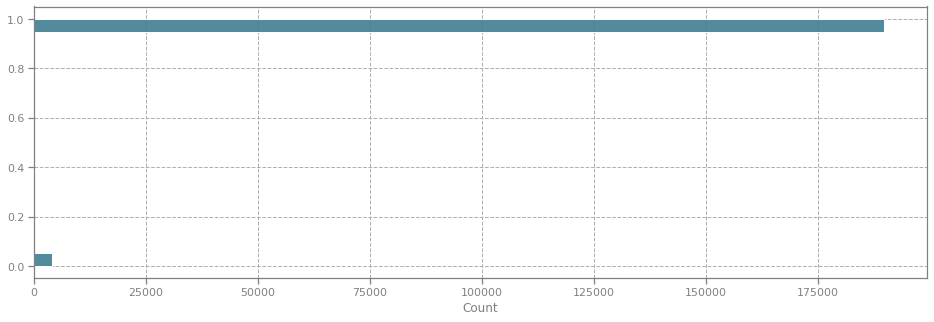

In [74]:
#Distribuição de probabilidades do teste ser positivo
plt.figure(figsize=[16,5])
sns.histplot(y=y_treino_LGBMO_proba[:,1], color=cor_zero, alpha=0.9);

A distribuição de probabilidades do gráfico acima mostra que todos os valores estão próximos de 0% ou 100%. E que realmente o modelo prevê muito mais vezes o paciente com COVID do que sem COVID.

A probabilidade de corte para tentar aumentar a precisão nesse caso deve ser algo muito próximo de 100%.

In [75]:
#Função para definir o resultado a partir da probabilidade e probabilidade de corte
def define_resultado(probabilidade, corte):
    if probabilidade >= corte:
        return 1
    else:
        return 0
    
def predicao_binaria(probabilidades,corte):
    probabilidades = pd.Series(probabilidades[:,1])
    return probabilidades.apply(lambda x: define_resultado(x, corte))

In [76]:
prob_corte = 0.999999995
y_treino_LGBMO_proba_pred = predicao_binaria(y_treino_LGBMO_proba, prob_corte)
y_valid_LGBMO_proba_pred = predicao_binaria(y_valid_LGBMO_proba, prob_corte)

In [77]:
metricas(y_treino, y_treino_LGBMO_proba_pred, y_valid, y_valid_LGBMO_proba_pred)

Treino:
Acc: 0.634, Precision: 0.664, Recall: 0.181
Validação:
Acc: 0.631, Precision: 0.661, Recall: 0.181


A probabilidade de corte encontrada que conseguiu aumentar a precisão foi 0.999999995. Porém como visto nas métricas acima o recall ficou ruim. Portanto nesse caso, não vale a pena alterar a probabilidade de corte para atingir novas métricas.

Mantem-se o modelo abaixo com probabilidade de corte 0.5:  
{'importance_type': 'gain',  
 'is_unbalance': False,  
 'learning_rate': 10,  
 'max_depth': 1,  
 'n_estimators': 10}

### 4.3 Teste do modelo encontrado no dataset de teste

In [78]:
X_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99939 entries, 41066 to 361185
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           99939 non-null  int64  
 1   sex                  99939 non-null  int64  
 2   patient_type         99939 non-null  int64  
 3   intubed              21433 non-null  float64
 4   pneumonia            99937 non-null  float64
 5   age                  99939 non-null  int64  
 6   pregnancy            48912 non-null  float64
 7   diabetes             99621 non-null  float64
 8   copd                 99655 non-null  float64
 9   asthma               99663 non-null  float64
 10  inmsupr              99615 non-null  float64
 11  hypertension         99646 non-null  float64
 12  other_disease        99518 non-null  float64
 13  cardiovascular       99644 non-null  float64
 14  obesity              99664 non-null  float64
 15  renal_chronic        99642 non-

De acordo com o modelo escolhido, as únicas variáveis de interesse são intubed e pneumonia. Portanto intubed será tratado da mesma forma como na seção 1.3 e depois todas as outras variáveis serão removidas.

#### 4.3.1 Tratar o dataset para a variável 'intubed' como feito na seção 1.3

Formas de tratamento:
- 1ª Quando o registro possui NaN para 'intubed' e possui valor em 'icu', o valor de 'icu' será copiado para 'intubed';
- 2ª A variável 'patient_type' será usada para ajudar a preencher as variáveis 'intubed' que forem NaN nos casos dos pacientes que foram dispensados para casa;
- 3ª Os valores NaN restantes receberão a moda

In [79]:
# Primeira forma
nan_intubed_icu = pd.DataFrame({'intubed':X_teste['intubed'],'icu':X_teste['icu']}).isna()
indices_nan_dif = nan_intubed_icu[nan_intubed_icu['intubed'] != nan_intubed_icu['icu']].index
indices_nan_intubed = X_teste['intubed'][X_teste['intubed'].isna()].index

In [80]:
# Segunda forma
X_teste['intubed'].loc[indices_nan_intubed] = np.where(X_teste['patient_type'].loc[indices_nan_intubed]==1,0, np.nan)

# Preencher os valores faltantes com a moda
X_teste['intubed'].fillna(X_teste['intubed'].mode()[0], inplace=True)
X_teste['pneumonia'].fillna(X_teste['pneumonia'].mode()[0], inplace=True)

#Verificar se ainda existe valores NaN em 'intubed'
X_teste['intubed'].isna().value_counts()

C:\Users\lucas\anaconda3\envs\Dsdegree\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


False    99939
Name: intubed, dtype: int64

In [81]:
#Dataset de teste apenas com as variáveis importantes
X_treino_minimizado = X_treino[['intubed','pneumonia']]
X_teste_minimizado = X_teste[['intubed','pneumonia']]

#### 4.3.2 Reajustar o modelo com os parâmetros otimizados mas agora com 2 variáveis de entrada

In [82]:
modelo_final = LGBMClassifier(importance_type='gain', is_unbalance=False, max_depth=1, learning_rate=10, n_estimators=10)
modelo_final.fit(X_treino_minimizado, y_treino)

y_treino_final_pred = modelo_final.predict(X_treino_minimizado)
y_teste_final_pred = modelo_final.predict(X_teste_minimizado)

#metricas
acc_train = accuracy_score(y_treino, y_treino_final_pred)
prec_train = precision_score(y_treino, y_treino_final_pred)
rec_train = recall_score(y_treino, y_treino_final_pred)

acc_teste = accuracy_score(y_teste, y_teste_final_pred)
prec_teste = precision_score(y_teste, y_teste_final_pred)
rec_teste = recall_score(y_teste, y_teste_final_pred)

print(f'Treino:\nAcc: {acc_train:.3f}, Precision: {prec_train:.3f}, Recall: {rec_train:.3f}')
print(f'Teste:\nAcc: {acc_teste:.3f}, Precision: {prec_teste:.3f}, Recall: {rec_teste:.3f}')

Treino:
Acc: 0.394, Precision: 0.396, Recall: 0.964
Teste:
Acc: 0.433, Precision: 0.436, Recall: 0.970


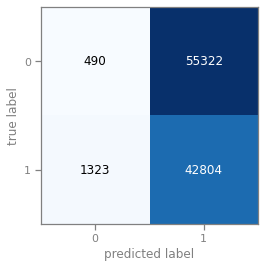

In [83]:
cm = confusion_matrix(y_teste, y_teste_final_pred)

plot_confusion_matrix(conf_mat=cm);

Houve diferença de aproximadamente 4% nas métricas de acurácia e precisão entre o dataset de treino e dataset de teste. Isso configuraria overfitting se o treino estivesse maior que o teste, mas não é o caso. Como foi feito cross-validation do GridSearch com 5 repartições acredito que isso aconteceu por 'sorte' dos dados de teste. Além disso, o recall manteve-se com boa performance.

## 5 Conclusões finais

O modelo encontrado não é bom para prever se o paciente possui ou não COVID, acerta em torno de 40% se a pessoa está ou não está com COVID. Porém para um diagnóstico preliminar, o modelo acerta mais de 95% dos casos de pacientes que realmente tem COVID, ou seja, poucos falso negativos.  

Provavelmente utilizar o learning rate alto (10) provocou algumas consequências indesejadas:  
- 1) Deu muita importância para apenas duas variáveis, as outras foram descartadas;
- 2) A previsão ficou muito agressiva (o famoso 8 ou 80), provavelmente por só ter duas variáveis;

Talvez utilizar learning rates mais baixos como 5 ou 2 podem fazer com que o modelo seja menos agressivo na predição, isso aumentaria a quantiade de variáveis importantes, porém acredito que o recall seria menor.



Como nesse caso, o importante é acertar a maior quantidade de pacientes que realmente estão com COVID, optou-se por ter esse recall grande, mesmo que a acurácia não seja tão boa e que o modelo seja muito agressivo na previsão.